To load the data, you will need to install the following packages: xarray and netCDF4.

The easiest way to get everything installed is to use conda:

`conda install -c conda-forge xarray netCDF4`

If you don’t use conda, be sure you have the required dependencies (numpy and pandas) installed first.

Then, install with pip:

`python -m pip install "xarray[io]"`

In [ ]:
from matplotlib import pyplot as plt
import xarray as xr
from matplotlib import animation
import numpy as np
from IPython.display import HTML

ds = xr.open_dataset(
    "./function.nc",  # path to the netCDF file
    engine="netcdf4",
)  # netCDF4 file format is implemented on top of HDF5, so function.nc is also readable by any HDF5 client

: 

In [2]:
# take a glance at the dataset
ds

<xarray.Dataset> Size: 33GB
Dimensions:                  (unit: 104171, readou_weight_dimension: 512,
                              time: 75000, stimulus_y: 72, stimulus_x: 128)
Coordinates:
    session                  (unit) int64 833kB ...
    scan_idx                 (unit) int64 833kB ...
    unit_id                  (unit) int64 833kB ...
  * readou_weight_dimension  (readou_weight_dimension) int64 4kB 0 1 ... 510 511
  * time                     (time) float64 600kB 0.0 0.03333 ... 2.5e+03
  * stimulus_y               (stimulus_y) int64 576B 0 1 2 3 4 ... 68 69 70 71
  * stimulus_x               (stimulus_x) int64 1kB 0 1 2 3 ... 124 125 126 127
Dimensions without coordinates: unit
Data variables:
    cc_max                   (unit) float64 833kB ...
    pref_ori                 (unit) float64 833kB ...
    pref_dir                 (unit) float64 833kB ...
    gOSI                     (unit) float64 833kB ...
    gDSI                     (unit) float64 833kB ...
    readout_weight           (unit, readou_weight_dimension) float32 213MB ...
    readout_location_x       (unit) float64 833kB ...
    readout_location_y       (unit) float64 833kB ...
    cc_abs                   (unit) float64 833kB ...
    natural_response         (unit, time) float32 31GB ...
    natural_movie            (time, stimulus_y, stimulus_x) int16 1GB ...
Attributes:
    documentation:  \nData variables:\n    pref_ori               : preferred...
    metadata:       {"oracle_scan_set_hash": "33995ece828b9057351bd194cf992f1...

In [3]:
# take a look at the documentation of the dataset
print(ds.attrs["documentation"])


Data variables:
    pref_ori               : preferred orientation in radians (0 - pi), horizontal bar moving upward is 0 and orientation increases clockwise, extracted from model responses to oriented noise stimuli
    pref_dir               : preferred direction in radians (0 - 2pi), horizontal bar moving upward is 0 and orientation increases clockwise, extracted from model responses to oriented noise stimuli
    gOSI                   : global orientation selectivity index,
    gDSI                   : global direction selectivity index,
    readout_weight         : readout weight vector,
    readout_location_x     : x coordinate of the readout location per unit, in a 128 * 72 downsampled stimulus space, this is an approximation of a neuron's receptive field center,
    readout_location_y     : y coordinate of the readout location per unit, in a 128 * 72 downsampled stimulus space, this is an approximation of a neuron's receptive field center,
    cc_abs                 : predictio

In [4]:
# access each data variable as numpy array
ds["pref_ori"].to_numpy()

array([1.35481633, 3.02805898, 1.38349898, ..., 1.74333898, 1.61326163,
       1.95840163])

In [5]:
# access data variables as pandas DataFrame with unit keys
ds[
    ["pref_ori", "pref_dir", "gOSI", "gDSI", "readout_location_x", "readout_location_y"]
].to_dataframe()

,pref_ori,pref_dir,gOSI,gDSI,readout_location_x,readout_location_y,session,scan_idx,unit_id
unit,,,,,,,,,
0,1.354816,1.354816,0.135329,0.042481,55.933125,29.821853,4,7,1
1,3.028059,6.169652,0.285000,0.038507,48.489399,27.261005,4,7,3
2,1.383499,4.525092,0.309489,0.041989,56.210960,28.617818,4,7,4
3,2.980972,2.980972,0.024608,0.155958,53.436188,23.995044,4,7,5
4,2.549192,2.549192,0.018994,0.033472,51.960030,24.472170,4,7,6
...,...,...,...,...,...,...,...,...,...
104166,0.244966,0.244966,0.104479,0.064690,53.008224,32.622844,9,6,5495
104167,2.861859,6.003452,0.301988,0.107630,57.060249,33.457384,9,6,5496
104168,1.743339,4.884932,0.210088,0.014101,64.980797,35.308883,9,6,5497


In [6]:
# access readout weights with unit as rows and feature dimension as columns
ds["readout_weight"].to_dataframe().reset_index().pivot_table(
    index=["session", "scan_idx", "unit_id"],
    columns="readou_weight_dimension",
    values="readout_weight",
)

readou_weight_dimension        0         1         2         3         4    \
session scan_idx unit_id                                                     
4       7        1        0.018045 -0.014897  0.050851 -0.026874 -0.111035   
                 3       -0.275777 -0.069857  0.170475 -0.134229  0.116332   
                 4       -0.286917  0.359062  0.062690  0.151191 -0.010566   
                 5       -0.042771 -0.213200  0.159567 -0.114658  0.140373   
                 6        0.218895  0.219268  0.271946 -0.030801  0.049134   
...                            ...       ...       ...       ...       ...   
9       6        5495    -0.336322  0.055094 -0.039860  0.012742  0.048036   
                 5496    -0.102662  0.162303 -0.253071  0.115870  0.638826   
                 5497    -0.214534 -0.010594  0.107317 -0.194225  0.199410   
                 5498    -0.044544  0.447102  0.239980  0.451406  0.538416   
                 5499     0.191393 -0.206407  0.037712  0.415033  0.181877   

readou_weight_dimension        5         6         7         8         9    \
session scan_idx unit_id                                                     
4       7        1       -0.033921 -0.102798 -0.203918  0.078648 -0.039701   
                 3       -0.120918 -0.005515 -0.120492 -0.383834 -0.071228   
                 4        0.329613  0.102639 -0.000715 -0.234042  0.124614   
                 5        0.038126  0.278615  0.154386  0.165111 -0.428001   
                 6       -0.082269  0.334857  0.104558 -0.368243 -0.076737   
...                            ...       ...       ...       ...       ...   
9       6        5495    -0.216522  0.034655 -0.104529  0.002130 -0.400351   
                 5496     0.416579  0.130991  0.198987 -0.028636  0.146605   
                 5497     0.252713 -0.068362  0.275794 -0.068141  0.162793   
                 5498     0.217309  0.193173  0.467544  0.292568  0.176607   
                 5499     0.566435  0.205022 -0.142065  0.198463 -0.515875   

readou_weight_dimension   ...       502       503       504       505  \
session scan_idx unit_id  ...                                           
4       7        1        ... -0.027843 -0.227857 -0.051022 -0.247556   
                 3        ...  0.176973 -0.118871  0.123387  0.002218   
                 4        ... -0.027298 -0.454202  0.152928  0.399896   
                 5        ... -0.489234  0.056540 -0.116950 -0.380029   
                 6        ... -0.181896 -0.171653  0.145466 -0.135694   
...                       ...       ...       ...       ...       ...   
9       6        5495     ...  0.162741  0.097453  0.450026 -0.038281   
                 5496     ...  0.115282 -0.184978  0.418386  0.299644   
                 5497     ... -0.121504 -0.646533  0.109213 -0.169130   
                 5498     ... -0.068108  0.210539  0.145047  0.294542   
                 5499     ...  0.333922  0.344227 -0.286349 -0.048145   

readou_weight_dimension        506       507       508       509       510  \
session scan_idx unit_id                                                     
4       7        1       -0.061937 -0.018479  0.197385  0.147056  0.058160   
                 3       -0.220288  0.156338  0.177372  0.271624 -0.165161   
                 4       -0.254106  0.540132 -0.168009 -0.132055  0.168182   
                 5        0.114530  0.372206  0.333672  0.213260 -0.187482   
                 6       -0.009075  0.224641  0.405508 -0.203463  0.268339   
...                            ...       ...       ...       ...       ...   
9       6        5495    -0.146865 -0.148239  0.088829 -0.105939 -0.191727   
                 5496     0.098519  0.017811  0.494313 -0.085372  0.303074   
                 5497     0.070838 -0.223955 -0.077528 -0.212134  0.283879   
                 5498     0.260041 -0.402603  0.364220  0.320358  0.040892   
                 5499     0.014681 -0.637578  0.910788  0.598558  0.363816   

reado

In [3]:
ds = ds.set_index(indexes={"unit": ["session", "scan_idx", "unit_id"]})
subset = (
    ds
    .isel(unit=slice(0, 5))  # select the first 5 units
    .sel(time=slice(50, 60))  # select 10 sec of responses from 50 sec to 60 sec
)

In [5]:
movie = subset["natural_movie"].values
time = subset["time"].values
response = subset["natural_response"].values
unit = subset.unit.values

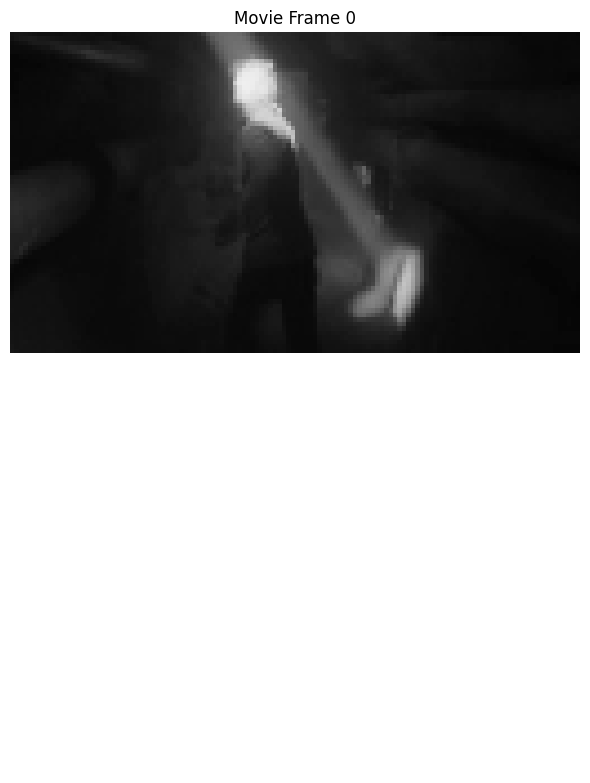

In [5]:
# get 5 units' responses to 10 sec of naturalistic movie stimuli and animate them

## get the responses and the corresponding stimuli
ds = ds.set_index(indexes={"unit": ["session", "scan_idx", "unit_id"]})
subset = (
    ds
    .isel(unit=slice(0, 5))  # select the first 5 units
    .sel(time=slice(50, 60))  # select 10 sec of responses from 50 sec to 60 sec
)
movie = subset["natural_movie"].values
time = subset["time"].values
response = subset["natural_response"].values
unit = subset.unit.values

## animate the stimuli and responses
fig, axs = plt.subplots(
    6,
    1,
    figsize=(6, 8),
    gridspec_kw={"height_ratios": [6, 1, 1, 1, 1, 1]},
)
mov_plot = axs[0].imshow(np.zeros_like(movie[0]), vmin=0, vmax=255, cmap="gray")
axs[0].axis("off")
line_plots = []
for i, ax in enumerate(axs[1:]):
    ax.set_ylim(response.min(), response.max())
    ax.set_xlim(time.min(), time.max())
    ax.axis("off")
    line_plots.append(ax.plot([], [], lw=2, c=f"C{i}"))
plt.tight_layout()


def update(frame):
    # Plot movie frame at the top
    mov_plot.set_data(movie[frame])
    axs[0].set_title(f"Movie Frame {frame}")

    # Plot line plots for units' activities
    for i in range(len(axs) - 1):
        line_plots[i][0].set_data(time[:frame], response[i, :frame])
    return mov_plot, line_plots


ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(movie),
    interval=33,
)

## show the animation in jupyter notebook
HTML(ani.to_html5_video())